### Load Data

In [16]:
import pandas as pd
data = pd.read_csv('bbc2018.csv')

In [17]:
data = data.dropna().reset_index(drop=True)
data.shape

(4421, 1)

In [18]:
data.head()

,"articles,lang"
0,Image copyright PA/EPA Image caption Oligarch ...
1,Russian President Vladimir Putin says a list o...
2,The list names 210 top Russians as part of a s...
3,"However, the US stressed those named were not ..."
4,Mr Putin said the list was an unfriendly act t...


In [19]:
data.columns

Index(['articles,lang'], dtype='object')

### cleaning

#### Keep English Articles

In [20]:
from langdetect import detect
from tqdm import tqdm_notebook
tqdm_notebook().pandas()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  This is separate from the ipykernel package so we can avoid doing imports until


C:\ProgramData\Anaconda3\lib\site-packages\tqdm\std.py:668: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [24]:
data['lang'] = data['articles,lang'][0:1000].progress_map(detect)

In [25]:
data.lang.value_counts()

en    968
es     14
da      4
de      2
ca      2
ro      1
cy      1
et      1
fr      1
pl      1
sv      1
it      1
tl      1
no      1
id      1
Name: lang, dtype: int64

In [26]:
data = data.loc[data.lang=='en']

### Tokenization

In [27]:

from nltk.tokenize import sent_tokenize

In [32]:
data['sentences'] = data['articles,lang'].progress_map(sent_tokenize)
data['sentences'].head().tolist()[0][:3] # Print the first 3 sentences of the 1st article

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


['Image copyright PA/EPA Image caption Oligarch Roman Abramovich (l) and PM Dmitry Medvedev are on the list']

In [33]:
data.head()

,"articles,lang",lang,sentences
0,Image copyright PA/EPA Image caption Oligarch ...,en,[Image copyright PA/EPA Image caption Oligarch...
1,Russian President Vladimir Putin says a list o...,en,[Russian President Vladimir Putin says a list ...
2,The list names 210 top Russians as part of a s...,en,[The list names 210 top Russians as part of a ...
3,"However, the US stressed those named were not ...",en,"[However, the US stressed those named were not..."
4,Mr Putin said the list was an unfriendly act t...,en,[Mr Putin said the list was an unfriendly act ...


In [34]:
from nltk.tokenize import word_tokenize

In [35]:
data['tokens_sentences'] = data['sentences'].progress_map(lambda sentences: [word_tokenize(sentence) for sentence in sentences])
print(data['tokens_sentences'].head(1).tolist()[0][:3])


[['Image', 'copyright', 'PA/EPA', 'Image', 'caption', 'Oligarch', 'Roman', 'Abramovich', '(', 'l', ')', 'and', 'PM', 'Dmitry', 'Medvedev', 'are', 'on', 'the', 'list']]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


### Lemmatizing with POS tagging

In [36]:
from nltk import pos_tag

In [37]:
data['POS_tokens'] = data['tokens_sentences'].progress_map(lambda tokens_sentences: [pos_tag(tokens) for tokens in tokens_sentences])
print(data['POS_tokens'].head(1).tolist()[0][:3])


[[('Image', 'NN'), ('copyright', 'NN'), ('PA/EPA', 'NNP'), ('Image', 'NNP'), ('caption', 'NN'), ('Oligarch', 'NNP'), ('Roman', 'NNP'), ('Abramovich', 'NNP'), ('(', '('), ('l', 'NN'), (')', ')'), ('and', 'CC'), ('PM', 'NNP'), ('Dmitry', 'NNP'), ('Medvedev', 'NNP'), ('are', 'VBP'), ('on', 'IN'), ('the', 'DT'), ('list', 'NN')]]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [38]:
# Inspired from https://stackoverflow.com/a/15590384
from nltk.corpus import wordnet

def get_wordnet_pos(treebank_tag):

    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return ''

from nltk.stem.wordnet import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [39]:

# Lemmatizing each word with its POS tag, in each sentence
data['tokens_sentences_lemmatized'] = data['POS_tokens'].progress_map(
    lambda list_tokens_POS: [
        [
            lemmatizer.lemmatize(el[0], get_wordnet_pos(el[1])) 
            if get_wordnet_pos(el[1]) != '' else el[0] for el in tokens_POS
        ] 
        for tokens_POS in list_tokens_POS
    ]
)

In [40]:

data['tokens_sentences_lemmatized'].head(1).tolist()[0][:3]

[['Image',
  'copyright',
  'PA/EPA',
  'Image',
  'caption',
  'Oligarch',
  'Roman',
  'Abramovich',
  '(',
  'l',
  ')',
  'and',
  'PM',
  'Dmitry',
  'Medvedev',
  'be',
  'on',
  'the',
  'list']]

In [80]:
data.head()

,"articles,lang",lang,sentences,tokens_sentences,POS_tokens,tokens_sentences_lemmatized,tokens,articles
0,Image copyright PA/EPA Image caption Oligarch ...,en,[Image copyright PA/EPA Image caption Oligarch...,"[[Image, copyright, PA/EPA, Image, caption, Ol...","[[(Image, NN), (copyright, NN), (PA/EPA, NNP),...","[[Image, copyright, PA/EPA, Image, caption, Ol...","[oligarch, roman, abramovich, pm, dmitry, medv...",Image copyright PA/EPA Image caption Oligarch ...
1,Russian President Vladimir Putin says a list o...,en,[Russian President Vladimir Putin says a list ...,"[[Russian, President, Vladimir, Putin, says, a...","[[(Russian, JJ), (President, NNP), (Vladimir, ...","[[Russian, President, Vladimir, Putin, say, a,...","[russian, president, vladimir, putin, list, of...",Russian President Vladimir Putin says a list o...
2,The list names 210 top Russians as part of a s...,en,[The list names 210 top Russians as part of a ...,"[[The, list, names, 210, top, Russians, as, pa...","[[(The, DT), (list, NN), (names, RB), (210, CD...","[[The, list, names, 210, top, Russians, as, pa...","[list, names, top, russians, part, sanction, l...",The list names 210 top Russians as part of a s...
3,"However, the US stressed those named were not ...",en,"[However, the US stressed those named were not...","[[However, ,, the, US, stressed, those, named,...","[[(However, RB), (,, ,), (the, DT), (US, NNP),...","[[However, ,, the, US, stress, those, name, be...","[however, us, stress, name, subject, new, sanc...","However, the US stressed those named were not ..."
4,Mr Putin said the list was an unfriendly act t...,en,[Mr Putin said the list was an unfriendly act ...,"[[Mr, Putin, said, the, list, was, an, unfrien...","[[(Mr, NNP), (Putin, NNP), (said, VBD), (the, ...","[[Mr, Putin, say, the, list, be, an, unfriendl...","[putin, list, unfriendly, act, complicate, tie...",Mr Putin said the list was an unfriendly act t...


### Regrouping tokens and removing stop words

In [41]:
from nltk.corpus import stopwords
stopwords_verbs = ['say', 'get', 'go', 'know', 'may', 'need', 'like', 'make', 'see', 'want', 'come', 'take', 'use', 'would', 'can']
stopwords_other = ['one', 'mr', 'bbc', 'image', 'getty', 'de', 'en', 'caption', 'also', 'copyright', 'something']
my_stopwords = stopwords.words('English') + stopwords_verbs + stopwords_other

In [42]:
from itertools import chain # to flatten list of sentences of tokens into list of tokens

In [43]:
data['tokens'] = data['tokens_sentences_lemmatized'].map(lambda sentences: list(chain.from_iterable(sentences)))
data['tokens'] = data['tokens'].map(lambda tokens: [token.lower() for token in tokens if token.isalpha() 
                                                    and token.lower() not in my_stopwords and len(token)>1])

In [44]:
data['tokens'].head(1).tolist()[0][:30]

['oligarch', 'roman', 'abramovich', 'pm', 'dmitry', 'medvedev', 'list']

In [81]:
data.head()

,"articles,lang",lang,sentences,tokens_sentences,POS_tokens,tokens_sentences_lemmatized,tokens,articles
0,Image copyright PA/EPA Image caption Oligarch ...,en,[Image copyright PA/EPA Image caption Oligarch...,"[[Image, copyright, PA/EPA, Image, caption, Ol...","[[(Image, NN), (copyright, NN), (PA/EPA, NNP),...","[[Image, copyright, PA/EPA, Image, caption, Ol...","[oligarch, roman, abramovich, pm, dmitry, medv...",Image copyright PA/EPA Image caption Oligarch ...
1,Russian President Vladimir Putin says a list o...,en,[Russian President Vladimir Putin says a list ...,"[[Russian, President, Vladimir, Putin, says, a...","[[(Russian, JJ), (President, NNP), (Vladimir, ...","[[Russian, President, Vladimir, Putin, say, a,...","[russian, president, vladimir, putin, list, of...",Russian President Vladimir Putin says a list o...
2,The list names 210 top Russians as part of a s...,en,[The list names 210 top Russians as part of a ...,"[[The, list, names, 210, top, Russians, as, pa...","[[(The, DT), (list, NN), (names, RB), (210, CD...","[[The, list, names, 210, top, Russians, as, pa...","[list, names, top, russians, part, sanction, l...",The list names 210 top Russians as part of a s...
3,"However, the US stressed those named were not ...",en,"[However, the US stressed those named were not...","[[However, ,, the, US, stressed, those, named,...","[[(However, RB), (,, ,), (the, DT), (US, NNP),...","[[However, ,, the, US, stress, those, name, be...","[however, us, stress, name, subject, new, sanc...","However, the US stressed those named were not ..."
4,Mr Putin said the list was an unfriendly act t...,en,[Mr Putin said the list was an unfriendly act ...,"[[Mr, Putin, said, the, list, was, an, unfrien...","[[(Mr, NNP), (Putin, NNP), (said, VBD), (the, ...","[[Mr, Putin, say, the, list, be, an, unfriendl...","[putin, list, unfriendly, act, complicate, tie...",Mr Putin said the list was an unfriendly act t...


### LDA

### Data preparation

### Prepare bi-grams and tri-grams

In [45]:
from gensim.models import Phrases

In [46]:
tokens = data['tokens'].tolist()
bigram_model = Phrases(tokens)
trigram_model = Phrases(bigram_model[tokens], min_count=1)
tokens = list(trigram_model[bigram_model[tokens]])

In [82]:
data.head()

,"articles,lang",lang,sentences,tokens_sentences,POS_tokens,tokens_sentences_lemmatized,tokens,articles
0,Image copyright PA/EPA Image caption Oligarch ...,en,[Image copyright PA/EPA Image caption Oligarch...,"[[Image, copyright, PA/EPA, Image, caption, Ol...","[[(Image, NN), (copyright, NN), (PA/EPA, NNP),...","[[Image, copyright, PA/EPA, Image, caption, Ol...","[oligarch, roman, abramovich, pm, dmitry, medv...",Image copyright PA/EPA Image caption Oligarch ...
1,Russian President Vladimir Putin says a list o...,en,[Russian President Vladimir Putin says a list ...,"[[Russian, President, Vladimir, Putin, says, a...","[[(Russian, JJ), (President, NNP), (Vladimir, ...","[[Russian, President, Vladimir, Putin, say, a,...","[russian, president, vladimir, putin, list, of...",Russian President Vladimir Putin says a list o...
2,The list names 210 top Russians as part of a s...,en,[The list names 210 top Russians as part of a ...,"[[The, list, names, 210, top, Russians, as, pa...","[[(The, DT), (list, NN), (names, RB), (210, CD...","[[The, list, names, 210, top, Russians, as, pa...","[list, names, top, russians, part, sanction, l...",The list names 210 top Russians as part of a s...
3,"However, the US stressed those named were not ...",en,"[However, the US stressed those named were not...","[[However, ,, the, US, stressed, those, named,...","[[(However, RB), (,, ,), (the, DT), (US, NNP),...","[[However, ,, the, US, stress, those, name, be...","[however, us, stress, name, subject, new, sanc...","However, the US stressed those named were not ..."
4,Mr Putin said the list was an unfriendly act t...,en,[Mr Putin said the list was an unfriendly act ...,"[[Mr, Putin, said, the, list, was, an, unfrien...","[[(Mr, NNP), (Putin, NNP), (said, VBD), (the, ...","[[Mr, Putin, say, the, list, be, an, unfriendl...","[putin, list, unfriendly, act, complicate, tie...",Mr Putin said the list was an unfriendly act t...


### Prepare objects for LDA gensim implementation

In [47]:
from gensim import corpora

In [48]:
dictionary_LDA = corpora.Dictionary(tokens)
dictionary_LDA.filter_extremes(no_below=3)
corpus = [dictionary_LDA.doc2bow(tok) for tok in tokens]

### Running LDA

In [49]:
from gensim import models
import numpy as np

In [50]:

np.random.seed(123456)
num_topics = 20
%time lda_model = models.LdaModel(corpus, num_topics=num_topics, \
                                  id2word=dictionary_LDA, \
                                  passes=4, alpha=[0.01]*num_topics, \
                                  eta=[0.01]*len(dictionary_LDA.keys()))

Wall time: 2.27 s


### Quick exploration of LDA results

### Looking at topics

In [52]:
for i,topic in lda_model.show_topics(formatted=True, num_topics=num_topics, num_words=20):
    print(str(i)+": "+ topic)
    print()

0: 0.019*"news" + 0.016*"restaurant" + 0.014*"people" + 0.012*"change" + 0.012*"majority" + 0.012*"million" + 0.012*"pa" + 0.012*"woman" + 0.012*"arianespace" + 0.012*"uk" + 0.011*"new" + 0.010*"body" + 0.009*"could" + 0.008*"team" + 0.008*"spend_hour" + 0.008*"system" + 0.008*"santorini" + 0.008*"move" + 0.008*"however" + 0.008*"year"

1: 0.015*"us" + 0.011*"story" + 0.011*"list" + 0.010*"become" + 0.009*"publish" + 0.008*"mean" + 0.007*"even" + 0.007*"life" + 0.007*"reach" + 0.007*"russian" + 0.006*"america" + 0.006*"trump" + 0.006*"start" + 0.006*"include" + 0.006*"law" + 0.006*"chief" + 0.006*"part" + 0.006*"football" + 0.006*"kind" + 0.006*"top"

2: 0.021*"less" + 0.018*"likely" + 0.014*"tell" + 0.013*"afp" + 0.012*"work" + 0.011*"give" + 0.011*"social_medium_platform" + 0.010*"orbit" + 0.010*"economic" + 0.010*"often" + 0.007*"long" + 0.007*"short" + 0.007*"model" + 0.007*"magazine" + 0.007*"report" + 0.007*"child" + 0.007*"strong" + 0.007*"final" + 0.007*"sleep" + 0.007*"new"

3

### Allocating topics to documents

In [57]:
data['articles']= data['articles,lang']

In [61]:
print(data.articles.loc[0:4][:500])

0    Image copyright PA/EPA Image caption Oligarch ...
1    Russian President Vladimir Putin says a list o...
2    The list names 210 top Russians as part of a s...
3    However, the US stressed those named were not ...
4    Mr Putin said the list was an unfriendly act t...
Name: articles, dtype: object


In [63]:
lda_model[corpus[1]]

[(1, 0.9844252)]

### Predicting topics on unseen documents

In [64]:
document = '''Eric Tucker, a 35-year-old co-founder of a marketing company in Austin, Tex., had just about 40 Twitter followers. But his recent tweet about paid protesters being bused to demonstrations against President-elect Donald J. Trump fueled a nationwide conspiracy theory — one that Mr. Trump joined in promoting. 

Mr. Tucker's post was shared at least 16,000 times on Twitter and more than 350,000 times on Facebook. The problem is that Mr. Tucker got it wrong. There were no such buses packed with paid protesters.

But that didn't matter.

While some fake news is produced purposefully by teenagers in the Balkans or entrepreneurs in the United States seeking to make money from advertising, false information can also arise from misinformed social media posts by regular people that are seized on and spread through a hyperpartisan blogosphere.

Here, The New York Times deconstructs how Mr. Tucker’s now-deleted declaration on Twitter the night after the election turned into a fake-news phenomenon. It is an example of how, in an ever-connected world where speed often takes precedence over truth, an observation by a private citizen can quickly become a talking point, even as it is being proved false.'''

In [65]:
tokens = word_tokenize(document)
topics = lda_model.show_topics(formatted=True, num_topics=num_topics, num_words=20)
pd.DataFrame([(el[0], round(el[1],2), topics[el[0]][1]) for el in lda_model[dictionary_LDA.doc2bow(tokens)]], columns=['topic #', 'weight', 'words in topic'])

,topic #,weight,words in topic
0,1,0.26,"0.015*""us"" + 0.011*""story"" + 0.011*""list"" + 0...."
1,3,0.12,"0.036*""work"" + 0.015*""well"" + 0.012*""human"" + ..."
2,10,0.20,"0.017*""include"" + 0.017*""health"" + 0.015*""expe..."
3,14,0.14,"0.017*""us"" + 0.012*""report"" + 0.012*""reuters"" ..."
4,16,0.26,"0.020*""might"" + 0.013*""follow"" + 0.013*""video""..."


### Advanced exploration of LDA results

### Allocation of topics in all documents

In [66]:
topics = [lda_model[corpus[i]] for i in range(len(data))]

In [84]:
def topics_document_to_dataframe(topics_document, num_topics):
    res = pd.DataFrame(columns=range(num_topics))
    for topic_weight in topics_document:
        res.loc[0, topic_weight[0]] = topic_weight[1]
    return res

topics_document_to_dataframe([(9, 0.03853655432967504), (15, 0.09130117862212643), (18, 0.8692868808484044)], 20)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0385366,NaN,NaN,NaN,NaN,NaN,0.0913012,NaN,NaN,0.869287,NaN


In [68]:
# Like TF-IDF, create a matrix of topic weighting, with documents as rows and topics as columns
document_topic = \
pd.concat([topics_document_to_dataframe(topics_document, num_topics=num_topics) for topics_document in topics]) \
  .reset_index(drop=True).fillna(0)

In [69]:
document_topic.head()


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.0,0.913635,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.00000,0.0,0.0,0.0,0.0
1,0.0,0.984425,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.00000,0.0,0.0,0.0,0.0
2,0.0,0.973610,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.00000,0.0,0.0,0.0,0.0
3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.96346,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.94062,0.00000,0.0,0.0,0.0,0.0


In [70]:
# Which document are about topic 14
document_topic.sort_values(14, ascending=False)[14].head(20)

713    0.993014
709    0.991441
265    0.991037
788    0.988271
227    0.987499
397    0.984425
351    0.983035
634    0.983035
637    0.983035
930    0.983035
149    0.983035
901    0.983035
652    0.981372
557    0.981372
42     0.979347
702    0.979347
19     0.979347
666    0.979347
85     0.976828
877    0.976828
Name: 14, dtype: float64

In [71]:
print(data.articles.loc[91][:1000])

To be in for a chance of one of the coveted stars, restaurants first have to be in a region Michelin covers. In 2016, it made history by releasing its first-ever Singapore edition, in which it awarded stars to street stalls for the first time.


### Looking at the distribution of topics in all documents

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


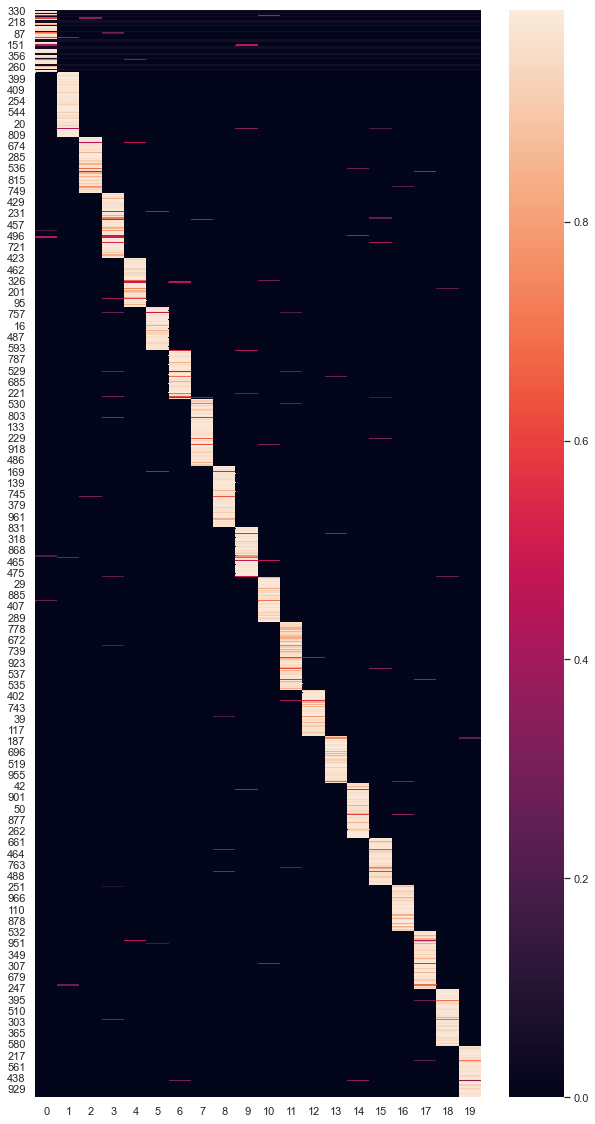

In [72]:
%matplotlib inline
import seaborn as sns; sns.set(rc={'figure.figsize':(10,20)})
sns.heatmap(document_topic.loc[document_topic.idxmax(axis=1).sort_values().index])

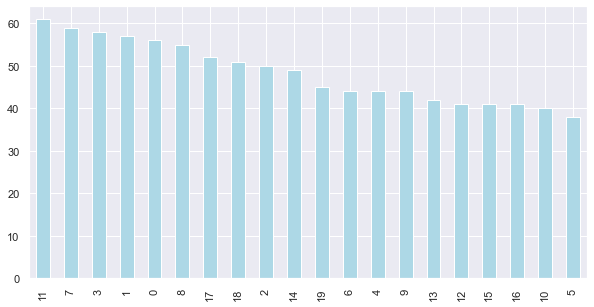

In [73]:
sns.set(rc={'figure.figsize':(10,5)})
document_topic.idxmax(axis=1).value_counts().plot.bar(color='lightblue')

### Visualizing topics

In [78]:
# https://cran.r-project.org/web/packages/LDAvis/vignettes/details.pdf
# Here a short legend to explain the vis:
# size of bubble: proportional to the proportions of the topics across the N total tokens in the corpus
# red bars: estimated number of times a given term was generated by a given topic
# blue bars: overall frequency of each term in the corpus
# -- Relevance of words is computed with a parameter lambda
# -- Lambda optimal value ~0.6 (https://nlp.stanford.edu/events/illvi2014/papers/sievert-illvi2014.pdf)
%matplotlib inline
import pyLDAvis
import pyLDAvis.gensim



In [79]:
vis = pyLDAvis.gensim.prepare(topic_model=lda_model, corpus=corpus, dictionary=dictionary_LDA)
pyLDAvis.enable_notebook()
pyLDAvis.display(vis)